In [ ]:
# TODO:
# Try something along the lines of: pip install numpy==1.23.0

# Install brevitas first to get the earlier version of numpy
!pip install brevitas
import brevitas.nn as qn

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np

# For lower dimensionality mapping
# !pip install umap-learn
# import umap

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
IMAGE_DEPTH = 64
PROJECT_PATH = '/content/drive/MyDrive/FinalYearProject/PYNQ'

learning_rate = 0.0005
batch_size = 1
train_batch_size = 64
epochs = 10

# **Datasets**

In [ ]:
# Class Enumeration
NORMAL_LABEL = 0
DoS_LABEL = 1
Fuzzy_LABEL = 2
Gear_LABEL = 3
RPM_LABEL = 4

In [ ]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from math import floor


class CAN_12Bit_Dataset(Dataset):
    def __init__(self, path : str, label_path : str, cls : int):
        self.all_data = None
        self.label_data = None
        self.cls = cls
        self.load(path, label_path)



    def __len__(self):
        return self.all_data.shape[0] - IMAGE_DEPTH

    def __getitem__(self, idx):

        if idx > (self.all_data.shape[0] - IMAGE_DEPTH):
            raise IndexError("list index out of range")

        image = self.all_data[idx : idx + IMAGE_DEPTH].transpose(0, 1) # Remove this when ready!
        labels = self.label_data[idx : idx + IMAGE_DEPTH]

        return (image, labels, self.cls)


    def load(self, path, label_path):
        self.all_data = torch.load(path, map_location=torch.device(device), weights_only=True).to(device)
        self.label_data = torch.load(label_path, map_location=torch.device(device), weights_only=True).to(device)


In [ ]:

# Get all Datasets/Dataloaders
DATA_PATH = PROJECT_PATH + '/Datasets/11_Bit'
LABEL_PATH = PROJECT_PATH + '/Datasets/Labels'

Train_Normal_DS = CAN_12Bit_Dataset(DATA_PATH + '/Train_Normal_data.torch', LABEL_PATH + '/Train_Normal_labels.torch', NORMAL_LABEL)
Train_DoS_DS = CAN_12Bit_Dataset(DATA_PATH + '/DoS_data.torch', LABEL_PATH + '/Train_DoS_labels.torch', DoS_LABEL)
Train_Fuzzy_DS = CAN_12Bit_Dataset(DATA_PATH + '/Fuzzy_data.torch', LABEL_PATH + '/Train_Fuzzy_labels.torch', Fuzzy_LABEL)
Train_Gear_DS = CAN_12Bit_Dataset(DATA_PATH + '/Gear_data.torch', LABEL_PATH + '/Train_Gear_labels.torch', Gear_LABEL)
Train_RPM_DS = CAN_12Bit_Dataset(DATA_PATH + '/RPM_data.torch', LABEL_PATH + '/Train_RPM_labels.torch', RPM_LABEL)

Test_Normal_DS = CAN_12Bit_Dataset(DATA_PATH + '/Test_Normal_data.torch', LABEL_PATH + '/Test_Normal_labels.torch', NORMAL_LABEL)


Train_Normal_DL = DataLoader(Train_Normal_DS, batch_size=train_batch_size, shuffle=True)
Train_DoS_DL = DataLoader(Train_DoS_DS, batch_size=batch_size, shuffle=True)
Train_Fuzzy_DL = DataLoader(Train_Fuzzy_DS, batch_size=batch_size, shuffle=True)
Train_Gear_DL = DataLoader(Train_Gear_DS, batch_size=batch_size, shuffle=True)
Train_RPM_DL = DataLoader(Train_RPM_DS, batch_size=batch_size, shuffle=True)

Test_Normal_DL = DataLoader(Test_Normal_DS, batch_size=batch_size, shuffle=True)

# **Convert Dataset to Numpy Dataset**

In [ ]:
def ConvertToNumpyDS_NHWC(torch_dataset, num_batches):
    data = np.zeros((num_batches, 64, 1, 11))
    labels = np.zeros((num_batches, 64))



    it = iter(torch_dataset)
    for i in range(num_batches):
        batch = next(it)
        data[i] = batch[0].cpu().numpy().reshape(64, 1, 11)
        labels[i] = batch[1].cpu().numpy()

    return data, labels

In [ ]:
data, labels = ConvertToNumpyDS_NHWC(Train_Normal_DS, 1000)
print(data.shape)
print(labels.shape)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_Normal_data_NHWC.npy', data)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_Normal_labels_NHWC.npy', labels)

(1000, 64, 1, 11)
(1000, 64)


In [ ]:
data, label = ConvertToNumpyDS_NHWC(Test_Normal_DS, 1000)
print(data.shape)
print(labels.shape)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Test_Normal_data_NHWC.npy', data)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Test_Normal_labels_NHWC.npy', labels)

(1000, 64, 1, 11)
(1000, 64)


In [ ]:
data, labels = ConvertToNumpyDS_NHWC(Train_DoS_DS, 1000)
print(data.shape)
print(labels.shape)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_DoS_data_NHWC.npy', data)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_DoS_labels_NHWC.npy', labels)

(1000, 64, 1, 11)
(1000, 64)


In [ ]:
data, labels = ConvertToNumpyDS_NHWC(Train_Fuzzy_DS, 1000)
print(data.shape)
print(labels.shape)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_Fuzzy_data_NHWC.npy', data)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_Fuzzy_labels_NHWC.npy', labels)

(1000, 64, 1, 11)
(1000, 64)


In [ ]:
data, labels = ConvertToNumpyDS_NHWC(Train_Gear_DS, 1000)
print(data.shape)
print(labels.shape)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_Gear_data_NHWC.npy', data)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_Gear_labels_NHWC.npy', labels)

(1000, 64, 1, 11)
(1000, 64)


In [ ]:
data, labels = ConvertToNumpyDS_NHWC(Train_RPM_DS, 1000)
print(data.shape)
print(labels.shape)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_RPM_data_NHWC.npy', data)
np.save(PROJECT_PATH + '/Datasets/11_Bit/Numpy/Train_RPM_labels_NHWC.npy', labels)

(1000, 64, 1, 11)
(1000, 64)


# **Model Definitions**

In [ ]:
# Choose Quantisation Level
from brevitas.quant import Int8Bias
bit_width = 1

In [ ]:
# Quantiser

# Base Binariser
from brevitas.inject import ExtendedInjector
from brevitas.core.quant import BinaryQuant
from brevitas.core.scaling import ParameterScaling
# from brevitas.inject.enum import ScalingImplType
from brevitas.core.scaling import ScalingImplType


class MySignedBinaryQuantizer(ExtendedInjector):
    tensor_quant = BinaryQuant
    scaling_impl=ParameterScaling
    scaling_init=1.0
    # scaling_impl = ScalingImplType.CONST
    # scale=1.0
    signed = True


""" Weight, Bias and Activation Binary Quantisers """
from brevitas.proxy import WeightQuantProxyFromInjector

class MySignedBinaryWeightQuantizer(MySignedBinaryQuantizer):
    proxy_class = WeightQuantProxyFromInjector


from brevitas.proxy import BiasQuantProxyFromInjector

class MySignedBinaryBiasQuantizer(MySignedBinaryQuantizer):
    proxy_class = BiasQuantProxyFromInjector



from brevitas.proxy import ActQuantProxyFromInjector

class MySignedBinaryActQuantizer(MySignedBinaryQuantizer):
    proxy_class = ActQuantProxyFromInjector

# Need this to make quantised ReLUs:
# binary_relu = QuantIdentity(act_quant=MySignedBinaryActQuantizer, return_quant_tensor=True)

In [ ]:
from brevitas.quant import Int8ActPerTensorFloat, Int8WeightPerTensorFloat, SignedBinaryWeightPerTensorConst, SignedBinaryActPerTensorConst

In [ ]:
use_bias = False


# AutoEncoder Encoder side definition
class AE_EncoderNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        # self.quant_input = qn.QuantIdentity(bit_width=bit_width, return_quant_tensor=True)

        self.input_layer = nn.Sequential(
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
            # qn.QuantLinear(12, 32, bias=use_bias, weight_quant=Int8WeightPerTensorFloat, bias_quant=Int8Bias),
            qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )

        self.l1 = nn.Sequential(
            qn.QuantConv2d(1, 128, 3, stride=1, padding=1, bias=use_bias, weight_quant=SignedBinaryWeightPerTensorConst, bias_quant=Int8Bias),
            nn.MaxPool2d(2),
            qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l2 = nn.Sequential(
            qn.QuantConv2d(128, 64, 3, stride=1, padding=1, bias=use_bias, weight_quant=SignedBinaryWeightPerTensorConst, bias_quant=Int8Bias),
            nn.MaxPool2d(2),
            qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l3 = nn.Sequential(
            qn.QuantConv2d(16, 32, 2, stride=2, bias=use_bias, weight_quant=SignedBinaryWeightPerTensorConst, bias_quant=Int8Bias),
            qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )


        # self.init_weights()


    def forward(self, x):
        out = self.input_layer(x)
        out = self.l1(out)
        out = self.l2(out)
        # out = self.l3(out)
        return out

    def init_weights(self):
        """ Do He Initialisation to prevent relu dead weights """
        for m in self.modules():
            if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
                torch.nn.init.kaiming_normal_(m.weight, nonlinearity='relu')


# AutoEncoder Decoder side definition
class AE_DecoderNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()


        self.l1 = nn.Sequential(
            qn.QuantConvTranspose2d(64, 128, 3, stride=2, padding=1, output_padding=1, bias=use_bias, weight_quant=SignedBinaryWeightPerTensorConst, bias_quant=Int8Bias),
            qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l2 = nn.Sequential(
            qn.QuantConvTranspose2d(128, 1, 3, stride=2, padding=1, output_padding=1, bias=use_bias, weight_quant=SignedBinaryWeightPerTensorConst, bias_quant=Int8Bias),
            qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l3 = nn.Sequential(
            qn.QuantConv2d(1, 1, 3, stride=1, padding=1, output_padding=1, bias=use_bias, weight_quant=SignedBinaryWeightPerTensorConst, bias_quant=Int8Bias),
            # qn.QuantSigmoid(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=False), #False to return normal torch tensor
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )

        # self.init_weights()

    def forward(self, x):
        out = self.l1(x)
        out = self.l2(out)
        out = self.l3(out)
        return out

    def init_weights(self):
        """ Do He Initialisation to prevent relu dead weights """
        for m in self.modules():
            if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
                torch.nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

In [ ]:
DEBUG = False

In [ ]:
# AutoEncoder Encoder side definition
class AE_EncoderNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        self.input_layer = nn.Sequential(
            qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),

            # Uncomment this:
            qn.QuantLinear(12, 32,
                           weight_quant=SignedBinaryWeightPerTensorConst,
                           weight_bit_width=1,
                           output_quant=SignedBinaryActPerTensorConst,
                           return_quant_tensor=True,
                           bias=False),
        )

        self.l1 = nn.Sequential(
            qn.QuantConv2d(1, 64, 4,
                           stride=2, padding=1,
                           weight_quant=SignedBinaryWeightPerTensorConst,
                           output_quant=SignedBinaryActPerTensorConst,
                           return_quant_tensor=True,
                           bias=False),
            # nn.MaxPool2d(2),
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l2 = nn.Sequential(
            qn.QuantConv2d(64, 128, 4,
                           stride=2, padding=1,
                           weight_quant=SignedBinaryWeightPerTensorConst,
                           output_quant=SignedBinaryActPerTensorConst,
                           return_quant_tensor=True,
                           bias=False),
            # nn.MaxPool2d(2),
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l3 = nn.Sequential(
            qn.QuantConv2d(128, 256, 4,
                           stride=2, padding=1,
                           weight_quant=SignedBinaryWeightPerTensorConst,
                           output_quant=SignedBinaryActPerTensorConst,
                           return_quant_tensor=True,
                           bias=False),
            # nn.MaxPool2d(2),
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l4 = nn.Sequential(
            qn.QuantConv2d(256, 512, 4,
                           stride=2, padding=1,
                           weight_quant=SignedBinaryWeightPerTensorConst,
                           output_quant=SignedBinaryActPerTensorConst,
                           return_quant_tensor=True,
                           bias=False),
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )


    def forward(self, x):
        if DEBUG:
            print(x.shape)
        out = self.input_layer(x)
        if DEBUG:
            print(out.shape)
        out = self.l1(out)
        if DEBUG:
            print(out.shape)
        out = self.l2(out)
        if DEBUG:
            print(out.shape)
        out = self.l3(out)
        if DEBUG:
            print(out.shape)
        out = self.l4(out)
        return out



# AutoEncoder Decoder side definition
class AE_DecoderNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()


        self.l1 = nn.Sequential(
            qn.QuantConvTranspose2d(512, 256, 3,
                                    stride=1, padding=1, output_padding=0,
                                    weight_quant=SignedBinaryWeightPerTensorConst,
                                    output_quant=SignedBinaryActPerTensorConst,
                                    return_quant_tensor=True,
                                    bias=False),
            qn.QuantUpsample(scale_factor=2, mode='nearest', return_quant_tensor=False),
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )

        self.l2 = nn.Sequential(
            qn.QuantConvTranspose2d(256, 128, 3,
                                    stride=1, padding=1, output_padding=0,
                                    weight_quant=SignedBinaryWeightPerTensorConst,
                                    output_quant=SignedBinaryActPerTensorConst,
                                    return_quant_tensor=True,
                                    bias=False),
            qn.QuantUpsample(scale_factor=2, mode='nearest', return_quant_tensor=False),
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l3 = nn.Sequential(
            qn.QuantConvTranspose2d(128, 64, 3,
                                    stride=1, padding=1, output_padding=0,
                                    weight_quant=SignedBinaryWeightPerTensorConst,
                                    output_quant=SignedBinaryActPerTensorConst,
                                    return_quant_tensor=True,
                                    bias=False),
            qn.QuantUpsample(scale_factor=2, mode='nearest', return_quant_tensor=False),
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l4 = nn.Sequential(
            qn.QuantConvTranspose2d(64, 1, 3,
                                    stride=1, padding=1, output_padding=0,
                                    weight_quant=SignedBinaryWeightPerTensorConst,
                                    output_quant=SignedBinaryActPerTensorConst,
                                    return_quant_tensor=True,
                                    bias=False),
            qn.QuantUpsample(scale_factor=2, mode='nearest', return_quant_tensor=False),
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
        )
        self.l5 = nn.Sequential(
            # qn.QuantConv2d(1, 1, 3, stride=1, padding=1, output_padding=0, bias=use_bias, weight_quant=SignedBinaryWeightPerTensorConst, bias_quant=Int8Bias),
            # qn.QuantIdentity(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=True),
            qn.QuantLinear(32, 12,
                           weight_quant=SignedBinaryWeightPerTensorConst,
                           output_quant=SignedBinaryActPerTensorConst,
                           return_quant_tensor=False,
                           bias=False),
            # qn.QuantSigmoid(act_quant=SignedBinaryActPerTensorConst, return_quant_tensor=False), #False to return normal torch tensor
        )

    def forward(self, x):
        if DEBUG:
            print(x.shape)
        out = self.l1(x)
        if DEBUG:
            print(out.shape)
        out = self.l2(out)
        if DEBUG:
            print(out.shape)
        out = self.l3(out)
        if DEBUG:
            print(out.shape)
        out = self.l4(out)
        if DEBUG:
            print(out.shape)
        out = self.l5(out)
        if DEBUG:
            print(out.shape)
            raise Exception("Stop")
        return out


In [ ]:
ShapeVec = [1,16,32] # 1, 16, 32 was pretty good

# TODO: Try starting with a large amount of filters and decreasing...
# Real-Time paper uses 128, 64 filters

ShapeVec = [1,128,12] # ...

# AutoEncoder Encoder side definition
class AE_EncoderNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        layersVec = [qn.QuantConv2d(ShapeVec[i], ShapeVec[i+1], 2, stride=2,
                                    weight_quant=SignedBinaryWeightPerTensorConst,
                                    output_quant=SignedBinaryActPerTensorConst,
                                    return_quant_tensor=True,
                                    bias=False)
                     for i in range(len(ShapeVec[:-1])) ]

        self.layers = nn.Sequential(*layersVec)


    def forward(self, x):
        out = self.layers(x)
        return out



# AutoEncoder Decoder side definition
class AE_DecoderNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        layersVec = [qn.QuantConvTranspose2d(ShapeVec[::-1][i], ShapeVec[::-1][i+1], 2, stride=2,
                                    weight_quant=SignedBinaryWeightPerTensorConst,
                                    output_quant=SignedBinaryActPerTensorConst,
                                    return_quant_tensor=True,
                                    bias=False)
                     for i in range(len(ShapeVec[:-1])) ]

        self.layers = nn.Sequential(*layersVec)


    def forward(self, x):
        out = self.layers(x)
        return out


In [ ]:
class AE_AutoEncoder(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.flatten = nn.Flatten()

        self.encoder = encoder.to(device)
        self.decoder = decoder.to(device)

    def forward(self, x):
        out = self.encoder(x)
        out = self.decoder(out)
        return out

In [ ]:
AutoEncoder = AE_AutoEncoder(AE_EncoderNN(), AE_DecoderNN()).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(AutoEncoder.parameters(), lr=0.0001) # lr=0.000001 = OLD

# **More Complex AutoEncoder**

In [ ]:
from brevitas.quant import Int8ActPerTensorFloat as ActQuant
from brevitas.quant import Int8WeightPerTensorFloat as WeightQuant
from brevitas.quant import Int8Bias


use_bias = True

class RealTime_AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        self.down1 = nn.Sequential(
            qn.QuantConv2d(1, 128, 3,
                            stride=1, padding=1,
                            input_quant=ActQuant,
                            weight_quant=WeightQuant,
                            bias_quant=Int8Bias,
                            output_quant=ActQuant,
                            return_quant_tensor=True,
                            bias=use_bias),
            qn.QuantReLU(act_quant=ActQuant, return_quant_tensor=True),
        )
        self.down2 = nn.Sequential(
            qn.QuantConv2d(128, 64, 3,
                           stride=1, padding=1,
                           input_quant=ActQuant,
                           weight_quant=WeightQuant,
                           bias_quant=Int8Bias,
                           output_quant=ActQuant,
                           return_quant_tensor=True,
                           bias=use_bias),
            qn.QuantReLU(act_quant=ActQuant, return_quant_tensor=True),
        )


        self.up1 = nn.Sequential(
            qn.QuantConvTranspose2d(64, 128, 3,
                                    stride=2, padding=1,
                                    output_padding=1,
                                    input_quant=ActQuant,
                                    weight_quant=WeightQuant,
                                    bias_quant=Int8Bias,
                                    output_quant=ActQuant,
                                    return_quant_tensor=True,
                                    bias=use_bias),
            qn.QuantReLU(act_quant=ActQuant, return_quant_tensor=True),
        )
        self.up2 = nn.Sequential(
            qn.QuantConvTranspose2d(128, 1, 3,
                                    stride=2, padding=1,
                                    output_padding=1,
                                    input_quant=ActQuant,
                                    weight_quant=WeightQuant,
                                    bias_quant=Int8Bias,
                                    output_quant=ActQuant,
                                    return_quant_tensor=True,
                                    bias=use_bias),
            qn.QuantReLU(act_quant=ActQuant, return_quant_tensor=True),
        )
        self.output_layer = nn.Sequential(
            qn.QuantConv2d(1, 1, 3,
                            stride=1, padding=1,
                            input_quant=ActQuant,
                            weight_quant=WeightQuant,
                            bias_quant=Int8Bias,
                            output_quant=ActQuant,
                            return_quant_tensor=True,
                            bias=use_bias),
            qn.QuantSigmoid(act_quant=ActQuant, return_quant_tensor=True),
        )



    def forward(self, x):
        out = self.down1(x)
        out = nn.MaxPool2d(2, stride=2)(out)
        out = self.down2(out)
        out = nn.MaxPool2d(2, stride=2)(out)

        out = self.up1(out)
        out = self.up2(out)
        out = self.output_layer(out)


        return out

In [ ]:
RT_AutoEncoder = RealTime_AutoEncoder().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(RT_AutoEncoder.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

In [ ]:
from brevitas.quant import Int8ActPerTensorFloat as ActQuant
from brevitas.quant import Int8WeightPerTensorFloat as WeightQuant
# from brevitas.quant import SignedBinaryActPerTensorConst as ActQuant
# from brevitas.quant import SignedBinaryWeightPerTensorConst as WeightQuant
from brevitas.quant import Int8Bias


use_bias = False
DEBUG = False

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        self.encode = nn.Sequential(
            # This is a TCN - Temporal Convolutional network!
            # nn.ConstantPad1d((2,0), 0), # leftside padding means causal convolution
            qn.QuantConv1d(11, 32, 3,
                           stride=1, padding=1,
                           input_quant=ActQuant,
                           weight_quant=WeightQuant,
                           bias_quant=Int8Bias,
                           output_quant=ActQuant,
                           return_quant_tensor=True,
                           bias=use_bias),
            # qn.QuantReLU(act_quant=ActQuant, return_quant_tensor=True),
            nn.MaxPool1d(2, stride=2),
            # nn.ConstantPad1d((2,0), 0),
            qn.QuantConv1d(32, 64, 3,
                           stride=1, padding=1,
                           input_quant=ActQuant,
                           weight_quant=WeightQuant,
                           bias_quant=Int8Bias,
                           output_quant=ActQuant,
                           return_quant_tensor=True,
                           bias=use_bias),
            nn.MaxPool1d(2, stride=2),
            # qn.QuantReLU(act_quant=ActQuant, return_quant_tensor=True),
        )


        self.decode = nn.Sequential(
            # nn.ConstantPad1d((2,0), 0),
            # Linear layer used as a FINN compatible upsample
            qn.QuantLinear(16, 64,
                           input_quant=ActQuant,
                           weight_quant=WeightQuant,
                           bias_quant=Int8Bias,
                           output_quant=ActQuant,
                           return_quant_tensor=True,
                           bias=use_bias),
            qn.QuantConv1d(64, 11, 3,
                           stride=1, padding=1,
                           input_quant=ActQuant,
                           weight_quant=WeightQuant,
                           bias_quant=Int8Bias,
                           output_quant=ActQuant,
                           return_quant_tensor=True,
                           bias=use_bias),
            # qn.QuantReLU(act_quant=ActQuant, return_quant_tensor=True),
        )
        # self.up2_1d = nn.Sequential(
        #     # nn.ConstantPad1d((2,0), 0),
        #     qn.QuantLinear(32, 64,
        #                    input_quant=ActQuant,
        #                    weight_quant=WeightQuant,
        #                    bias_quant=Int8Bias,
        #                    output_quant=ActQuant,
        #                    return_quant_tensor=True,
        #                    bias=use_bias),
        #     qn.QuantConv1d(32, 11, 3,
        #                    stride=1, padding=1,
        #                    input_quant=ActQuant,
        #                    weight_quant=WeightQuant,
        #                    bias_quant=Int8Bias,
        #                    output_quant=ActQuant,
        #                    return_quant_tensor=True,
        #                    bias=use_bias),
        # )



    def forward(self, x):
        # 1d convolutions
        # print(x.shape)
        out = self.encode(x)
        # print(out.shape)

        # out = nn.Upsample(scale_factor=2, mode='nearest')(out)
        out = self.decode(out)
        # print(out.shape)
        # out = nn.Upsample(scale_factor=2, mode='nearest')(out)
        # out = self.up2_1d(out)
        # print(out.shape)
        # raise Exception("Stop")


        return out

In [ ]:
AutoEncoder = AutoEncoder().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(AutoEncoder.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

In [ ]:
# Load Model
AutoEncoder.load_state_dict(torch.load('/content/drive/MyDrive/FinalYearProject/PYNQ/Models/TemporalConvNets/AsymLinearTCN_32_64.model', map_location=torch.device(device), weights_only=True))
AutoEncoder = AutoEncoder.to(device)

# **Brevitas Example**

In [ ]:
# Copyright (C) 2023, Advanced Micro Devices, Inc. All rights reserved.
# SPDX-License-Identifier: BSD-3-Clause

from dependencies import value

from brevitas.core.bit_width import BitWidthImplType
from brevitas.core.quant import QuantType
from brevitas.core.restrict_val import FloatToIntImplType
from brevitas.core.restrict_val import RestrictValueType
from brevitas.core.scaling import ScalingImplType
from brevitas.core.zero_point import ZeroZeroPoint
from brevitas.inject import ExtendedInjector
from brevitas.quant.solver import ActQuantSolver
from brevitas.quant.solver import WeightQuantSolver


class CommonQuant(ExtendedInjector):
    bit_width_impl_type = BitWidthImplType.CONST
    scaling_impl_type = ScalingImplType.CONST
    restrict_scaling_type = RestrictValueType.FP
    zero_point_impl = ZeroZeroPoint
    float_to_int_impl_type = FloatToIntImplType.ROUND
    scaling_per_output_channel = False
    narrow_range = True
    signed = True

    @value
    def quant_type(bit_width):
        if bit_width is None:
            return QuantType.FP
        elif bit_width == 1:
            return QuantType.BINARY
        else:
            return QuantType.INT


class CommonWeightQuant(CommonQuant, WeightQuantSolver):
    scaling_const = 1.0


class CommonActQuant(CommonQuant, ActQuantSolver):
    min_val = -1.0
    max_val = 1.0

In [ ]:
input = (Train_Normal_DS[0][0])
print(input)
quantised_input = qn.QuantIdentity(act_quant=CommonActQuant, bit_width=BIT_WIDTH)(input[0])
print(quantised_input) # TODO: Also might need to physically access the first QuantId from the model itself

tensor([[0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
         0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
         0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
         0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.,

In [ ]:
class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq1 = nn.Sequential(

            qn.QuantIdentity(act_quant=CommonActQuant, bit_width=8),
            qn.QuantConv1d(11, 32, 3,
                           stride=1, padding=1,
                           weight_bit_width=8,
                           weight_quant=CommonWeightQuant,
                           bias=False),
            nn.MaxPool1d(2, stride=2),
            qn.QuantIdentity(act_quant=CommonActQuant, bit_width=8),
        )
        self.seq2 = nn.Sequential(

            qn.QuantConv1d(32, 64, 3,
                           stride=1, padding=1,
                           weight_bit_width=8,
                           weight_quant=CommonWeightQuant,
                           bias=False),
            nn.MaxPool1d(2, stride=2),
            qn.QuantIdentity(act_quant=CommonActQuant, bit_width=8),
        )
        self.seq3 = nn.Sequential(

            qn.QuantLinear(16, 64,
                           weight_quant=CommonWeightQuant,
                           weight_bit_width=8,
                           bias=False),
            qn.QuantIdentity(act_quant=CommonActQuant, bit_width=8),
            qn.QuantConv1d(64, 11, 3,
                           stride=1, padding=1,
                           weight_quant=CommonWeightQuant,
                           weight_bit_width=8,
                           bias=False),
        )

    def forward(self, x):
        x = self.seq1(x)
        x = self.seq2(x)
        x = self.seq3(x)
        return x

In [ ]:
# Use non square conv2d

BIT_WIDTH = 8

class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encode = nn.Sequential(
            qn.QuantIdentity(act_quant=CommonActQuant, bit_width=BIT_WIDTH),
            qn.QuantConv2d(11, 32, (3, 1),
                           stride=(1, 1), padding=(1, 0),
                           weight_bit_width=BIT_WIDTH,
                           weight_quant=CommonWeightQuant,
                           bias=False),
            nn.MaxPool2d((2,1), stride=(2,1)),

            qn.QuantIdentity(act_quant=CommonActQuant, bit_width=BIT_WIDTH),
            qn.QuantConv2d(32, 64, (3, 1),
                           stride=(1, 1), padding=(1, 0),
                           weight_bit_width=BIT_WIDTH,
                           weight_quant=CommonWeightQuant,
                           bias=False),
            nn.MaxPool2d((2,1), stride=(2,1)),
        )
        self.decode = nn.Sequential(
            nn.Upsample(scale_factor=(2,1)),
            qn.QuantIdentity(act_quant=CommonActQuant, bit_width=BIT_WIDTH),
            qn.QuantConv2d(64, 32, (3, 1),
                           stride=1, padding=(1, 0),
                           weight_quant=CommonWeightQuant,
                           weight_bit_width=BIT_WIDTH,
                           bias=False),
            nn.Upsample(scale_factor=(2,1)),
            qn.QuantIdentity(act_quant=CommonActQuant, bit_width=BIT_WIDTH),
            qn.QuantConv2d(32, 11, (3, 1),
                           stride=1, padding=(1, 0),
                           weight_quant=CommonWeightQuant,
                           weight_bit_width=BIT_WIDTH,
                           bias=False),
            qn.QuantIdentity(act_quant=CommonActQuant, bit_width=BIT_WIDTH),
        )

    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [ ]:
# Use non square conv2d


class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encode = nn.Sequential(
            # qn.QuantIdentity(act_quant=CommonActQuant, bit_width=BIT_WIDTH),
            nn.Conv2d(11, 32, (3, 1),
                           stride=(1, 1), padding=(1, 0),
                           bias=False),
            nn.ReLU(),
            nn.MaxPool2d((2,1), stride=(2,1)),

            nn.Conv2d(32, 64, (3, 1),
                           stride=(1, 1), padding=(1, 0),
                           bias=False),
            nn.ReLU(),
            nn.MaxPool2d((2,1), stride=(2,1)),
        )
        self.decode = nn.Sequential(
            nn.Upsample(scale_factor=(2,1)),
            nn.Conv2d(64, 32, (3, 1),
                           stride=1, padding=(1, 0),
                           bias=False),
            nn.ReLU(),
            nn.Upsample(scale_factor=(2,1)),
            nn.Conv2d(32, 11, (3, 1),
                           stride=1, padding=(1, 0),
                           bias=False),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [ ]:
ae = AE().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

In [ ]:
_input = torch.rand(1, 11, 64, 1).to(device)
ae(_input)


# conv_res = nn.Conv2d(11, 32, (1, 3), padding=(0, 1))(_input)
# print(conv_res.shape)
# pool_res = nn.MaxPool2d((1, 2), stride=(1, 2))(conv_res)
# print(pool_res.shape)

tensor([[[[0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
        

In [ ]:
ae.load_state_dict(torch.load('/content/drive/MyDrive/FinalYearProject/PYNQ/Models/TemporalConvNets/NonSquareConv2D_AE_2Stride_OutputQuantised_10_3_2025.model', map_location=torch.device(device), weights_only=True))

<All keys matched successfully>

# **TLD**

In [ ]:
class System(nn.Module):
    def __init__(self):
        super().__init__()
        self.AE = AutoEncoder1D()
        self.threshold = 0.6 # TODO:
        self.classifier = nn.Sequential(
            qn.QuantConv1d(11, 6, 3,
                           stride=1, padding=1,
                           input_quant=ActQuant,
                           weight_quant=WeightQuant,
                           bias_quant=Int8Bias,
                           output_quant=ActQuant,
                           return_quant_tensor=True,
                           bias=use_bias),
            qn.QuantReLU(act_quant=ActQuant, return_quant_tensor=True),
            nn.MaxPool1d(2, stride=2),
            qn.QuantConv1d(6, 1, 3,
                           stride=1, padding=1,
                           input_quant=ActQuant,
                           weight_quant=WeightQuant,
                           bias_quant=Int8Bias,
                           output_quant=ActQuant,
                           return_quant_tensor=True,
                           bias=use_bias),
            qn.QuantReLU(act_quant=ActQuant, return_quant_tensor=True),

            qn.QuantLinear(8, 4,
                           input_quant=ActQuant,
                           weight_quant=WeightQuant,
                           bias_quant=Int8Bias,
                           output_quant=ActQuant,
                           return_quant_tensor=True,
                           bias=use_bias),
            nn.Softmax(),
        )

        def forward(self, x):
            latent = self.AE.encoder(x)
            reconstructed = self.AE.decoder(latent)

            if reconstructed_loss > self.threshold:
                out = torch.zeros(1)
            else:
                out = self.classifier(latent)
            return out



# **Non-Quantised**

In [ ]:

use_bias = True
DEBUG = False

class NonQuantisedAutoEncoder1D(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        self.encode = nn.Sequential(
            # This is a TCN - Temporal Convolutional network!
            nn.ConstantPad1d((2,0), 0), # leftside padding means causal convolution
            nn.Conv1d(11, 11, 3,
                      stride=1, padding=0,
                      bias=use_bias),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2),

            nn.ConstantPad1d((2,0), 0),
            nn.Conv1d(11, 11, 3,
                      stride=1, padding=0,
                      bias=use_bias),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2),
        )

        self.decode = nn.Sequential(
            nn.ConstantPad1d((2,0), 0),
            nn.Conv1d(11, 11, 3,
                      stride=1, padding=0,
                      bias=use_bias),
            nn.ReLU(),

            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ConstantPad1d((2,0), 0),
            nn.Conv1d(11, 11, 3,
                      stride=1, padding=0,
                      bias=use_bias),
            nn.ReLU(),

            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.ConstantPad1d((2,0), 0),
            nn.Conv1d(11, 11, 3,
                      stride=1, padding=0,
                      bias=use_bias),



            nn.Conv1d(11, 11, 3,
                      stride=1, padding=1,
                      bias=use_bias),

        )



    def forward(self, x):
        # 1d convolutions
        out = self.encode(x)

        out = self.decode(out)

        return out

In [ ]:
NQAutoEncoder = NonQuantisedAutoEncoder1D().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(NQAutoEncoder.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# **Basic Model Training test**

In [ ]:
losses_to_plot = []
def train_loop(dataloader, model, loss_fn, optimizer):
    INNER_TRAINING_SAVE_PATH = '/content/drive/MyDrive/FinalYearProject/PYNQ/Models/CurrentModelInsideLoop'
    size = len(dataloader)
    GRANULARITY = 100
    largest_in_grain = 0
    running_loss = 0
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, labels, cls) in enumerate(dataloader):
        try:
            if (len(X) != batch_size) and (len(X) != train_batch_size):
                print(f"Batch size warning! [{X.shape}]")
                continue

            # Compute prediction and loss
            # X = torch.reshape(X, (-1, 1, 64, 12))
            # X = torch.reshape(X, (-1, 64, 12))
            X = torch.reshape(X, (-1, 11, 64, 1))
            # X = (X * 2) - 1.0
            pred = model(X)

            loss = loss_fn(pred, X)

            if DEBUG:
                print(f"X   : {X}", end='\n-----------------------------------\n')
                print(f"Pred: {pred}")
                print(f"X Shape   : {X.shape}", end='\n-----------------------------------\n')
                print(f"Pred Shape: {pred.shape}")
                return



            # Backpropagation
            loss.backward()       # Figures out the loss gradient of each weight
            optimizer.step()      # Adjust all weights according to the given optimiser
            optimizer.zero_grad() # Reset the optimiser gradient for next iteration

            running_loss += loss

            if loss > largest_in_grain:
                largest_in_grain = loss

            if batch % GRANULARITY == 0:
                loss = loss.item()
                losses_to_plot.append(loss)
                current = batch

                avg_loss = running_loss / GRANULARITY
                running_loss = 0
                print(f"loss: {avg_loss:>7f}  [{current:>5d}/{size:>5d}] <-> largest in grain: {largest_in_grain:>7f}")
                largest_in_grain = 0
                if loss > 1000:
                    print(f"X:    {X.shape} -\n{X}")
                    print(f"Pred: {pred.shape} -\n{pred}")
            if batch % 2000 == 0:
                torch.save(model.state_dict(), INNER_TRAINING_SAVE_PATH)
        except KeyboardInterrupt:
            print("Interrupted")
            torch.save(model.state_dict(), INNER_TRAINING_SAVE_PATH)
            return False
    return True

# **Train**

In [ ]:
losses_to_plot = [] # Reset
DEBUG = False
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    if train_loop(Train_Normal_DL, ae, loss_fn, optimizer) == False:
        # Interrupted
        break

    # Step the scheduler
    lr_scheduler.step()

Epoch 1
-------------------------------
loss: 0.003573  [    0/12360] <-> largest in grain: 0.357305
loss: 0.236344  [  100/12360] <-> largest in grain: 0.350370
loss: 0.171267  [  200/12360] <-> largest in grain: 0.202922
loss: 0.126250  [  300/12360] <-> largest in grain: 0.144887
loss: 0.097509  [  400/12360] <-> largest in grain: 0.109646
loss: 0.080999  [  500/12360] <-> largest in grain: 0.091219
loss: 0.071329  [  600/12360] <-> largest in grain: 0.079184
loss: 0.065409  [  700/12360] <-> largest in grain: 0.071083
loss: 0.061061  [  800/12360] <-> largest in grain: 0.066082
loss: 0.057033  [  900/12360] <-> largest in grain: 0.061660
loss: 0.054057  [ 1000/12360] <-> largest in grain: 0.058923
loss: 0.051464  [ 1100/12360] <-> largest in grain: 0.055724
loss: 0.049014  [ 1200/12360] <-> largest in grain: 0.052358
loss: 0.047317  [ 1300/12360] <-> largest in grain: 0.051027
loss: 0.045634  [ 1400/12360] <-> largest in grain: 0.049008
loss: 0.044126  [ 1500/12360] <-> largest in 

In [ ]:
# Fine tune the learning rate
for g in optimizer.param_groups:
    g['lr'] = 0.0001

In [ ]:
# Save Model
torch.save(ae.state_dict(), '/content/drive/MyDrive/FinalYearProject/PYNQ/Models/TemporalConvNets/.model')

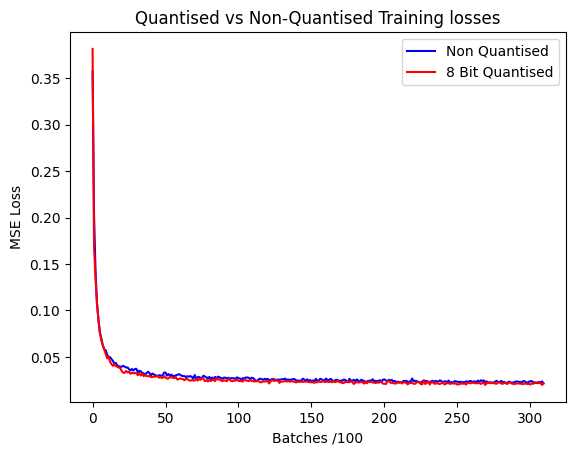

In [ ]:
# Plot the losses over time
plt.plot(losses_to_plot[:len(losses_to_plot)//4], color='blue', label='Non Quantised')
plt.plot(bit_8_losses[:len(bit_8_losses)//4], color='red',  label='8 Bit Quantised')
plt.xlabel('Batches /100')
plt.ylabel('MSE Loss')
plt.title('Quantised vs Non-Quantised Training losses')
plt.legend()
plt.show()

In [ ]:
bit_8_losses = losses_to_plot

# **Model Statistics**

In [ ]:
print(len(Train_DoS_DS))
print(len(Train_Normal_DS))

SampleSize = 100000
DoS_RT, Normal_RT, Fuzzy_RT, Gear_RT, RPM_RT = 0, 0, 0, 0, 0
for i in range(SampleSize):
    DoS_RT += torch.sum(Train_DoS_DS[i][0]).item()
    Normal_RT += torch.sum(Train_Normal_DS[i][0]).item()
    Fuzzy_RT += torch.sum(Train_Fuzzy_DS[i][0]).item()
    Gear_RT += torch.sum(Train_Gear_DS[i][0]).item()
    RPM_RT += torch.sum(Train_RPM_DS[i][0]).item()

print(f"DoS Mean: {DoS_RT/SampleSize}")
print(f"Normal Mean: {Normal_RT/SampleSize}")
print(f"Fuzzy Mean: {Fuzzy_RT/SampleSize}")
print(f"Gear Mean: {Gear_RT/SampleSize}")
print(f"RPM Mean: {RPM_RT/SampleSize}")

2932552
791032
DoS Mean: 196.81311
Normal Mean: 258.00318
Fuzzy Mean: 269.43503
Gear Mean: 294.00737
RPM Mean: 269.82123


This data (possibly) shows why it is much harder to detect DoS attacks, because DoS data is much sparser (includes much fewer 1's) rewarding guessing 0's


Solution to this is to pre-process the data to be 0 = -1 and 1 = 1

In [ ]:
from math import sqrt

class FastModelStats:
    def __init__(self):
        self.n       = 0
        self.mean    = 0
        self.std_dev = 0
        self.z       = 3 # 3 std dev = 99.7% 4 std dev = 99.99%
        self.losses  = None
        self.calculated = False


    def calculate(self, model : nn.Module, normal_train_dl : DataLoader, loss_fn, num_batches=-1, threat=False, threshold=-1) -> None:
        """ This can be used to get the models statistics for the normal data and anomaly data and then can be compared """

        size = len(normal_train_dl) if num_batches == -1 else num_batches
        self.losses = torch.zeros(size, device=torch.device(device))
        self.calculated = True

        model.eval()


        # Only use these values if threshold is set.
        self.FP = 0 # False Positive
        self.FN = 0 # False Negative
        self.TP = 0 # True Positive
        self.TN = 0 # True Negative

        with torch.no_grad():
            for batch, (X, labels, cls) in enumerate(normal_train_dl):
                if len(X) != 1:
                    # Batch Size should only be 1
                    raise Exception(f"Batch size warning! [{X.shape}]")
                    continue

                if threat == True and torch.sum(labels) == 0:
                    # Non threat in threat dataset
                    ThreatImage = False
                else:
                    ThreatImage = True

                # X = (X * 2) - 1.0
                X = torch.reshape(X, (-1, 11, 64, 1))
                pred = model(X)
                reconstruction_loss = loss_fn(pred, X)

                if ThreatImage == True:
                    self.losses[self.n] = reconstruction_loss
                    self.n += 1

                    if reconstruction_loss > threshold:
                        self.TP += 1
                    else:
                        self.FN += 1
                else:
                    if reconstruction_loss > threshold:
                        self.FP += 1
                    else:
                        self.TN += 1



                if (batch % 1000) == 0:
                    print(f"\rBatch {batch} loss: {reconstruction_loss:<5f} [{batch}/{size}]", end='', flush=True)
                if batch >= (num_batches - 1):
                    print(f"{batch + 1} Batches Complete!")
                    break

    def clear(self):
        self.std_dev = 0
        self.mean = 0
        self.n = 0
        self.losses = None
        self.calculated = False

    def calculate_mean(self):
        if not self.calculated:
            raise Exception("No losses have been calculated")
        self.mean = np.mean(self.losses[:self.n].cpu().detach().numpy())
        return self.mean

    def calculate_standard_deviation(self):
        if not self.calculated:
            raise Exception("No losses have been calculated")
        self.std_dev = np.std(self.losses[:self.n].cpu().detach().numpy())
        return self.std_dev

    def getThreshold(self) -> float:
        if not self.calculated:
            raise Exception("No losses have been calculated")
        return self.mean + (self.z * self.std_dev)


    def getRecall(self):
        if (self.TP + self.FN):
            self.recall = self.TP / (self.TP + self.FN)
        else:
            self.recall = 0
        return self.recall

    def getPrecision(self):
        if (self.TP + self.FP):
            self.precision = self.TP / (self.TP + self.FP)
        else:
            self.precision = 0
        return self.precision

    def getF1(self):
        if (self.precision + self.recall):
            self.F1 = (2 * self.precision * self.recall) / (self.precision + self.recall)
        else:
            self.F1 = 0
        return self.F1

    def getAccuracy(self):
        if (self.TP + self.TN + self.FP + self.FN):
            self.accuracy = (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)
        else:
            self.accuracy = 0
        return self.accuracy

    def plot_losses(self, title : str = "", threat=False, normal_threshold=-1):
        if not self.calculated:
            raise Exception("No losses have been calculated")

        plt.hist(self.losses[:self.n].cpu().detach().numpy(), bins=100)

        # Plot control lines
        if threat == True:
            plt.axvline(normal_threshold, color='r', linestyle='dashed', linewidth=1, label="Normal Threshold")
        else:
            one_std_dev = self.mean + self.std_dev
            two_std_dev = self.mean + (self.std_dev * 2)
            three_std_dev = self.mean + (self.std_dev * 3)
            plt.axvline(self.mean, color='k', linestyle='dashed', linewidth=1, label="Mean")
            plt.axvline(one_std_dev, color='g', linestyle='dashed', linewidth=1, label="1 Standard Deviation")
            plt.axvline(two_std_dev, color='b', linestyle='dashed', linewidth=1, label="2 Standard Deviation")
            plt.axvline(three_std_dev , color='r', linestyle='dashed', linewidth=1, label="3 Standard Deviation")

        plt.legend(loc='upper right')
        plt.title(title)
        plt.xlabel('Reconstruction Loss')
        plt.ylabel('Frequency')
        plt.show()


    def print_stats(self):
        if not self.calculated:
            raise Exception("No losses have been calculated")
        print(f"Model Stats: ")
        print(f"Mean:      {self.mean:>5f}")
        print(f"Std Dev:   {self.std_dev:>5f}")
        print(f"Threshold: {self.getThreshold():>5f}")

        print(f"Recall:    {self.recall:>5f}")
        print(f"Precision: {self.precision:>5f}")
        print(f"F1:        {self.F1:>5f}")
        print(f"Accuracy:  {self.accuracy:>5f}")


    def get_stats(self, model : nn.Module, normal_train_dl : DataLoader, loss_fn, num_batches=-1, title : str = "", threat=False, normal_threshold=-1):
        self.clear()
        self.calculate(model, normal_train_dl, loss_fn, num_batches, threat, normal_threshold)
        self.calculate_mean()
        self.calculate_standard_deviation()

        self.getPrecision()
        self.getRecall()
        self.getF1()
        self.getAccuracy()

        self.print_stats()
        self.plot_losses(title, threat, normal_threshold)


In [ ]:
NUM_STATS_BATCHES = 10000 # Run this many data points as sample size
DUT = ae # Design (Model) Under Test

Batch 9000 loss: 0.012934 [9000/10000]10000 Batches Complete!
Model Stats: 
Mean:      0.017158
Std Dev:   0.004837
Threshold: 0.031668
Recall:    1.000000
Precision: 1.000000
F1:        1.000000
Accuracy:  1.000000


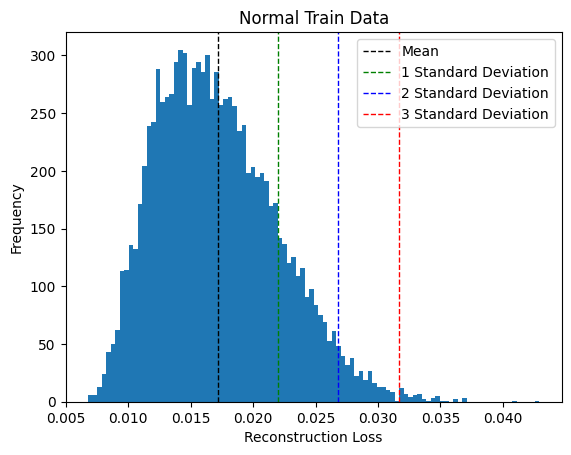

In [ ]:
Train_Normal_DL_1_batch = DataLoader(Train_Normal_DS, batch_size=1, shuffle=True)
normal_model_stats = FastModelStats()
normal_model_stats.get_stats(DUT, Train_Normal_DL_1_batch, loss_fn, NUM_STATS_BATCHES, "Normal Train Data")

Batch 9000 loss: 0.014301 [9000/10000]10000 Batches Complete!
Model Stats: 
Mean:      0.016977
Std Dev:   0.004770
Threshold: 0.031287
Recall:    1.000000
Precision: 1.000000
F1:        1.000000
Accuracy:  1.000000


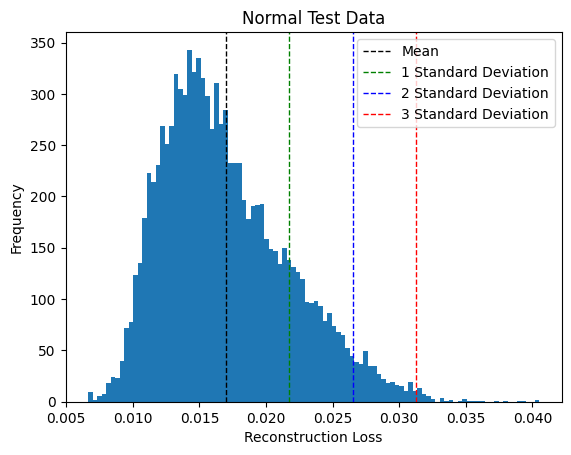

In [ ]:
TestNormal_model_stats = FastModelStats()
TestNormal_model_stats.get_stats(DUT, Test_Normal_DL, loss_fn, NUM_STATS_BATCHES, "Normal Test Data")

In [ ]:
FP_err_count = 0
for i in range(TestNormal_model_stats.n):
    if TestNormal_model_stats.losses[i] > normal_model_stats.getThreshold():
        FP_err_count += 1
print(f"False Positive (FP) Errors: {FP_err_count}/{TestNormal_model_stats.n} = {(FP_err_count/TestNormal_model_stats.n)*100}%")

Batch 9000 loss: 0.120335 [9000/10000]10000 Batches Complete!
Model Stats: 
Mean:      0.102969
Std Dev:   0.011594
Threshold: 0.137750
Recall:    0.995444
Precision: 0.962176
F1:        0.978527
Accuracy:  0.983700


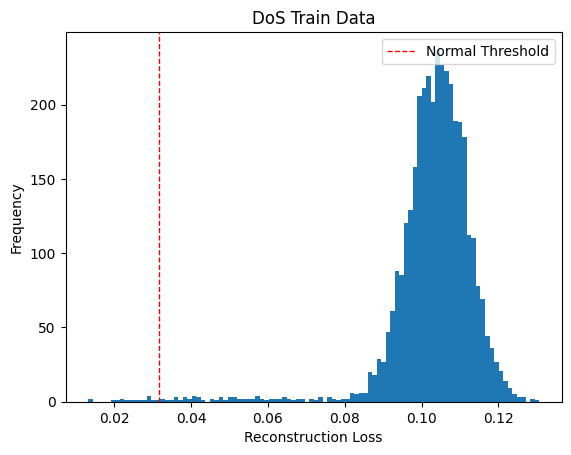

In [ ]:
DoS_model_stats = FastModelStats()
DoS_model_stats.get_stats(DUT, Train_DoS_DL, loss_fn, NUM_STATS_BATCHES, "DoS Train Data", True, normal_model_stats.getThreshold())

In [ ]:
DoS_err_count = 0
for i in range(DoS_model_stats.n):
    if DoS_model_stats.losses[i] < normal_model_stats.getThreshold():
        DoS_err_count += 1
print(f"DoS Errors: {DoS_err_count}/{DoS_model_stats.n} = {(DoS_err_count/DoS_model_stats.n)*100}%")

In [ ]:
fuzzy_model_stats = FastModelStats()
fuzzy_model_stats.get_stats(DUT, Train_Fuzzy_DL, loss_fn, NUM_STATS_BATCHES, "Fuzzy Train Data", True, normal_model_stats.getThreshold())

In [ ]:
fuzzy_err_count = 0
for i in range(fuzzy_model_stats.n):
    if fuzzy_model_stats.losses[i] < normal_model_stats.getThreshold():
        fuzzy_err_count += 1
print(f"Fuzzy Errors: {fuzzy_err_count}/{fuzzy_model_stats.n} = {(fuzzy_err_count/fuzzy_model_stats.n)*100}%")

Fuzzy Errors: 6/4314 = 0.13908205841446453%


In [ ]:
gear_model_stats = FastModelStats()
gear_model_stats.get_stats(DUT, Train_Gear_DL, loss_fn, NUM_STATS_BATCHES, "Gear Train Data", True, normal_model_stats.getThreshold())

In [ ]:
gear_err_count = 0
for i in range(gear_model_stats.n):
    if gear_model_stats.losses[i] < normal_model_stats.getThreshold():
        gear_err_count += 1
print(f"Gear Errors: {gear_err_count}/{gear_model_stats.n} = {(gear_err_count/gear_model_stats.n) * 100}%")

Batch 9000 loss: 0.011507 [9000/10000]10000 Batches Complete!
Model Stats: 
Mean:      0.064569
Std Dev:   0.009322
Threshold: 0.092535
Recall:    0.995331
Precision: 0.990706
F1:        0.993013
Accuracy:  0.992200


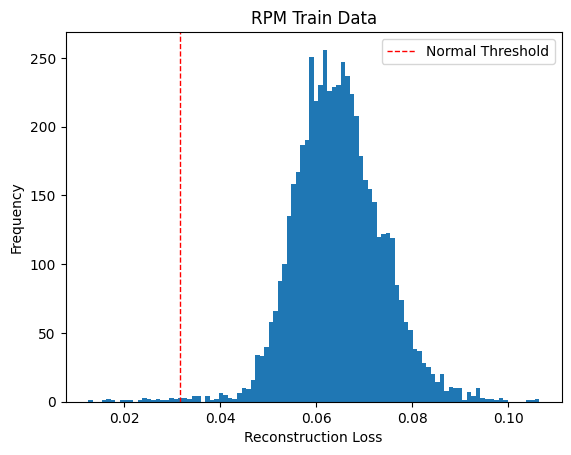

In [ ]:
RPM_model_stats = FastModelStats()
RPM_model_stats.get_stats(DUT, Train_RPM_DL, loss_fn, NUM_STATS_BATCHES, "RPM Train Data", True, normal_model_stats.getThreshold())

In [ ]:
RPM_err_count = 0
for i in range(RPM_model_stats.n):
    if RPM_model_stats.losses[i] < normal_model_stats.getThreshold():
        RPM_err_count += 1
print(f"RPM Errors: {RPM_err_count}/{RPM_model_stats.n} = {(RPM_err_count/RPM_model_stats.n) * 100}%")

In [ ]:
print(RPM_model_stats.FP)
print(RPM_model_stats.FN)
print(RPM_model_stats.TP)
print(RPM_model_stats.TN)

In [ ]:
print(gear_model_stats.FP)
print(gear_model_stats.FN)
print(gear_model_stats.TP)
print(gear_model_stats.TN)

In [ ]:
print(DoS_model_stats.FP)
print(DoS_model_stats.FN)
print(DoS_model_stats.TP)
print(DoS_model_stats.TN)

In [ ]:
print(fuzzy_model_stats.FP)
print(fuzzy_model_stats.FN)
print(fuzzy_model_stats.TP)
print(fuzzy_model_stats.TN)

97
6
4308
5589


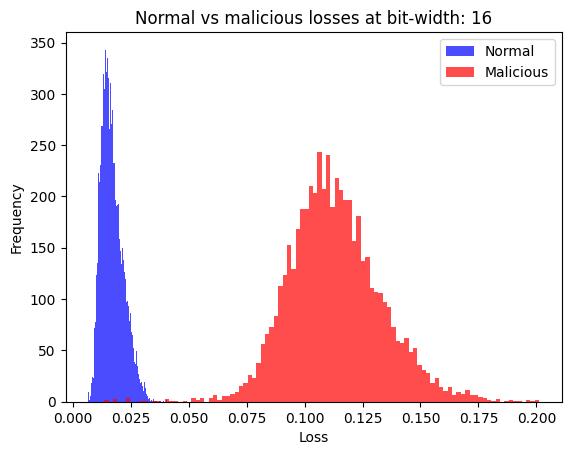

In [ ]:
import matplotlib.pyplot as plt

malicious = gear_model_stats

# Example data
array1 = TestNormal_model_stats.losses.cpu().detach().numpy()
array2 = malicious.losses[:malicious.n].cpu().detach().numpy()

# Plot the histogram
plt.hist(array1, bins=100, color='blue', alpha=0.7, label='Normal')
plt.hist(array2, bins=100, color='red', alpha=0.7, label='Malicious')

# Add labels and legend
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title(f'Normal vs malicious losses at bit-width: {BIT_WIDTH}')
plt.legend()

# Show the plot
plt.show()

# **Benchmark Quantisation and Layers**

In [ ]:
%pip install torchinfo
%pip install torchstat

In [ ]:
import timeit
from torchinfo import summary
from torchstat import stat

In [ ]:
summary(ae, input_size=(1, 11, 64, 1))

Layer (type:depth-idx)                   Output Shape              Param #
AE                                       [1, 11, 64, 1]            --
├─Sequential: 1-1                        [1, 64, 16, 1]            --
│    └─Conv2d: 2-1                       [1, 32, 64, 1]            1,056
│    └─ReLU: 2-2                         [1, 32, 64, 1]            --
│    └─MaxPool2d: 2-3                    [1, 32, 32, 1]            --
│    └─Conv2d: 2-4                       [1, 64, 32, 1]            6,144
│    └─ReLU: 2-5                         [1, 64, 32, 1]            --
│    └─MaxPool2d: 2-6                    [1, 64, 16, 1]            --
├─Sequential: 1-2                        [1, 11, 64, 1]            --
│    └─Upsample: 2-7                     [1, 64, 32, 1]            --
│    └─Conv2d: 2-8                       [1, 32, 32, 1]            6,144
│    └─ReLU: 2-9                         [1, 32, 32, 1]            --
│    └─Upsample: 2-10                    [1, 32, 64, 1]            --
│    └

In [ ]:
summary(RT_AutoEncoder, input_size=(1, 1, 64, 12))

Layer (type:depth-idx)                                                 Output Shape              Param #
RealTime_AutoEncoder                                                   [1, 1, 64, 12]            --
├─Sequential: 1-1                                                      [1, 128, 64, 12]          1
│    └─QuantConv2d: 2-1                                                [1, 128, 64, 12]          1,281
│    │    └─ActQuantProxyFromInjector: 3-1                             [1, 1, 64, 12]            1
├─Sequential: 1-27                                                     --                        (recursive)
│    └─QuantSigmoid: 2-36                                              --                        (recursive)
│    │    └─ActQuantProxyFromInjector: 3-55                            --                        (recursive)
├─Sequential: 1-7                                                      --                        (recursive)
│    └─QuantConv2d: 2-5                                   

In [ ]:
summary(conv, input_size=(1, 128, 64, 12))

Layer (type:depth-idx)                   Output Shape              Param #
Conv2d                                   [1, 1, 64, 12]            1,152
Total params: 1,152
Trainable params: 1,152
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.88
Input size (MB): 0.39
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.40

In [ ]:
summary(deconv, input_size=(1, 128, 32, 6))

Layer (type:depth-idx)                   Output Shape              Param #
ConvTranspose2d                          [1, 1, 64, 12]            1,152
Total params: 1,152
Trainable params: 1,152
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.88
Input size (MB): 0.10
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.11

In [ ]:
for i in range(10):
    # Conv benchmark
    conv_benchmark = timeit.timeit("conv(conv_input)", globals=locals(), number=NUMBER_OF_TIMINGS)

    # Deconv benchmark
    deconv_benchmark = timeit.timeit("deconv(deconv_input)", globals=locals(), number=NUMBER_OF_TIMINGS)

    # Display benchmarks
    print(f"Conv Benchmark:   {conv_benchmark:<5f} / {NUMBER_OF_TIMINGS} = {conv_benchmark/NUMBER_OF_TIMINGS:<5f}")
    print(f"Deconv Benchmark: {deconv_benchmark:<5f} / {NUMBER_OF_TIMINGS} = {deconv_benchmark/NUMBER_OF_TIMINGS:<5f}")
    print("")

**Results**\
1.\
Conv Benchmark:   34.695 / 10000 = 0.003469\
Deconv Benchmark: 30.531 / 10000 = 0.00305\
2.
Conv Benchmark:   33.846728195000196 / 10000 = 0.003385\
Deconv Benchmark: 31.313208005999968 / 10000 = 0.003131\
3.

# **Test Against Threats**

In [ ]:
how_many = 1500
it = iter(Train_DoS_DL)
for i in range(how_many):
    X = next(it)[0].reshape((-1, 1, IMAGE_DEPTH, 12))
X = (X * 2) - 1.0


nor_it = iter(Train_Normal_DL)
for i in range(how_many):
    XNor = next(nor_it)[0].reshape((-1, 1, IMAGE_DEPTH, 12))
XNor = (XNor * 2) - 1.0

# print(X)
with torch.no_grad():
    pred = AutoEncoder(X)
    loss = loss_fn(pred, X)
    print(loss)
    print(pred)

    pred = AutoEncoder(XNor)
    loss = loss_fn(pred, XNor)
    print(loss)
    print(pred)

tensor(0.8171, device='cuda:0')
IntQuantTensor(value=tensor([[[[-1.,  1.,  1.,  ..., -1., -1., -1.],
          [ 1.,  1.,  1.,  ..., -1.,  1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ...,  1., -1., -1.],
          [-1., -1.,  1.,  ..., -1., -1., -1.],
          [ 1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1.,  1.,  1.,  ..., -1., -1., -1.],
          [ 1.,  1.,  1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [ 1.,  1., -1.,  ..., -1., -1., -1.],
          [-1., -1.,  1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ...,  1., -1., -1.],
          [-1., -1., -1.,  ...,  1., -1., -1.],
          [ 1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1.,  1.,  ...,  1., -1., -1.],
          [ 1., -1.,  1.,  ..., -1.,  1., -1.],
          [-1., -1., -1.,  ...,  1.,  1., -1.]]],


        ...,


        [[[

In [ ]:
def test_against_anomailes(dataloader, model, loss_fn):
    size = len(dataloader)

    num_below_threshold = 0
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    with torch.no_grad():
        for batch, (X, labels, cls) in enumerate(dataloader):
            if (len(X) != batch_size) and (len(X) != train_batch_size):
                print(f"Batch size warning! [{X.shape}]")
                continue
            if torch.sum(labels) == 0:
                continue

            # Compute prediction and loss
            X = torch.reshape(X, (-1, 1, 64, 12))
            X = (X * 2) - 1.0
            pred = model(X)

            loss = loss_fn(pred, X)


            if loss < RECONSTRUCTION_THRESHOLD:
                num_below_threshold += 1
                # print(f"Num Below Threshold = {num_below_threshold}/{batch}")

            if batch % 100 == 0:
                loss = loss.item()
                current = batch * batch_size + len(X)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}] <-> Accuracy: {(num_below_threshold/batch) * 100}%")

In [ ]:
test_against_anomailes(Train_DoS_DS, AutoEncoder, loss_fn)

loss: 0.697917  [ 1501/2932552] <-> Accuracy: 2.8000000000000003%
loss: 0.781250  [ 1601/2932552] <-> Accuracy: 2.75%
loss: 0.848958  [ 1701/2932552] <-> Accuracy: 3.4705882352941178%
loss: 0.770833  [ 1801/2932552] <-> Accuracy: 3.722222222222222%
loss: 0.734375  [ 1901/2932552] <-> Accuracy: 3.684210526315789%
loss: 0.833333  [ 2001/2932552] <-> Accuracy: 3.5000000000000004%
loss: 0.864583  [ 2101/2932552] <-> Accuracy: 3.5238095238095237%
loss: 0.869792  [ 2201/2932552] <-> Accuracy: 3.5454545454545454%
loss: 0.760417  [ 2301/2932552] <-> Accuracy: 3.956521739130435%
loss: 0.859375  [ 2401/2932552] <-> Accuracy: 3.875%
loss: 0.880208  [ 2501/2932552] <-> Accuracy: 3.7199999999999998%
loss: 0.776042  [ 2601/2932552] <-> Accuracy: 3.6923076923076925%
loss: 0.932292  [ 2701/2932552] <-> Accuracy: 3.7777777777777777%
loss: 0.802083  [ 2801/2932552] <-> Accuracy: 3.75%
loss: 0.848958  [ 2901/2932552] <-> Accuracy: 3.689655172413793%
loss: 0.828125  [ 3001/2932552] <-> Accuracy: 3.8333333

KeyboardInterrupt: 

In [ ]:
test_against_anomailes(Train_Fuzzy_DS, AutoEncoder, loss_fn)

loss: 0.932292  [ 1601/3071024] <-> Accuracy: 1.25%
loss: 0.833333  [ 1701/3071024] <-> Accuracy: 1.1764705882352942%
loss: 0.932292  [ 1801/3071024] <-> Accuracy: 1.1111111111111112%
loss: 0.859375  [ 1901/3071024] <-> Accuracy: 1.0526315789473684%
loss: 0.958333  [ 2001/3071024] <-> Accuracy: 1.0%
loss: 1.010417  [ 2101/3071024] <-> Accuracy: 0.9523809523809524%
loss: 1.031250  [ 2201/3071024] <-> Accuracy: 0.9090909090909091%
loss: 1.000000  [ 2301/3071024] <-> Accuracy: 0.8695652173913043%
loss: 1.125000  [ 2401/3071024] <-> Accuracy: 0.8333333333333334%
loss: 1.192708  [ 2501/3071024] <-> Accuracy: 0.8%
loss: 1.161458  [ 2601/3071024] <-> Accuracy: 0.7692307692307693%
loss: 1.088542  [ 2701/3071024] <-> Accuracy: 0.7407407407407408%
loss: 0.989583  [ 2801/3071024] <-> Accuracy: 0.7142857142857143%
loss: 0.979167  [ 2901/3071024] <-> Accuracy: 0.6896551724137931%
loss: 1.072917  [ 3001/3071024] <-> Accuracy: 0.6666666666666667%
loss: 0.921875  [ 3101/3071024] <-> Accuracy: 0.645161

KeyboardInterrupt: 

In [ ]:
test_against_anomailes(Train_Gear_DS, AutoEncoder, loss_fn)

loss: 0.744792  [ 2101/3554449] <-> Accuracy: 0.9523809523809524%
loss: 0.682292  [ 2201/3554449] <-> Accuracy: 1.7727272727272727%
loss: 0.828125  [ 2301/3554449] <-> Accuracy: 1.7826086956521738%
loss: 0.802083  [ 2401/3554449] <-> Accuracy: 1.7916666666666667%
loss: 0.828125  [ 2501/3554449] <-> Accuracy: 1.8800000000000001%
loss: 0.661458  [ 2601/3554449] <-> Accuracy: 2.423076923076923%
loss: 0.890625  [ 2701/3554449] <-> Accuracy: 2.5925925925925926%
loss: 0.859375  [ 2801/3554449] <-> Accuracy: 2.5357142857142856%
loss: 0.895833  [ 2901/3554449] <-> Accuracy: 2.5517241379310347%
loss: 0.864583  [ 3001/3554449] <-> Accuracy: 2.566666666666667%
loss: 0.807292  [ 3101/3554449] <-> Accuracy: 2.612903225806452%
loss: 0.822917  [ 3201/3554449] <-> Accuracy: 2.71875%
loss: 0.848958  [ 3301/3554449] <-> Accuracy: 2.696969696969697%
loss: 0.895833  [ 3401/3554449] <-> Accuracy: 2.911764705882353%
loss: 0.947917  [ 3501/3554449] <-> Accuracy: 2.8857142857142857%
loss: 0.864583  [ 3601/355

KeyboardInterrupt: 

In [ ]:
test_against_anomailes(Train_RPM_DS, AutoEncoder, loss_fn)

loss: 0.817708  [ 1701/3697297] <-> Accuracy: 1.411764705882353%
loss: 0.750000  [ 1801/3697297] <-> Accuracy: 1.7777777777777777%
loss: 0.729167  [ 1901/3697297] <-> Accuracy: 2.2631578947368425%
loss: 0.703125  [ 2001/3697297] <-> Accuracy: 3.25%
loss: 0.760417  [ 2101/3697297] <-> Accuracy: 4.0476190476190474%
loss: 0.838542  [ 2201/3697297] <-> Accuracy: 4.2272727272727275%
loss: 0.802083  [ 2301/3697297] <-> Accuracy: 4.6521739130434785%
loss: 0.864583  [ 2401/3697297] <-> Accuracy: 5.0%
loss: 0.770833  [ 2501/3697297] <-> Accuracy: 5.0%
loss: 0.817708  [ 2601/3697297] <-> Accuracy: 4.846153846153846%
loss: 0.864583  [ 2701/3697297] <-> Accuracy: 4.925925925925926%
loss: 0.765625  [ 2801/3697297] <-> Accuracy: 5.857142857142858%
loss: 0.723958  [ 2901/3697297] <-> Accuracy: 6.275862068965517%
loss: 0.708333  [ 3001/3697297] <-> Accuracy: 7.066666666666667%
loss: 0.791667  [ 3101/3697297] <-> Accuracy: 7.129032258064516%
loss: 0.739583  [ 3201/3697297] <-> Accuracy: 7.1249999999999

KeyboardInterrupt: 

# **Test Normal Test Data**

In [ ]:
def test_normal(dataloader, model, loss_fn):
    size = len(dataloader)
    highest = 0.0
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    with torch.no_grad():
        for batch, (X, labels, cls) in enumerate(dataloader):
            if (len(X) != batch_size) and (len(X) != train_batch_size):
                print(f"Batch size warning! [{X.shape}]")
                continue

            # Compute prediction and loss
            X = torch.reshape(X, (-1, 1, 64, 12))
            X = (X * 2) - 1.0
            pred = model(X)

            loss = loss_fn(pred, X)

            if batch % 1 == 0:
                loss = loss.item()
                if loss > highest:
                    highest = loss
                    print(f"Highest Loss: {highest}")
                current = batch * batch_size + len(X)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
test_normal(Test_Normal_DL, AutoEncoder, loss_fn)

Highest Loss: 0.8072916865348816
loss: 0.807292  [    1/197710]
Highest Loss: 0.9114583730697632
loss: 0.911458  [    2/197710]
loss: 0.682292  [    3/197710]
Highest Loss: 0.9270833730697632
loss: 0.927083  [    4/197710]
loss: 0.796875  [    5/197710]
loss: 0.755208  [    6/197710]
loss: 0.770833  [    7/197710]
loss: 0.880208  [    8/197710]
loss: 0.744792  [    9/197710]
loss: 0.869792  [   10/197710]
loss: 0.760417  [   11/197710]
loss: 0.791667  [   12/197710]
loss: 0.927083  [   13/197710]
loss: 0.812500  [   14/197710]
Highest Loss: 1.03125
loss: 1.031250  [   15/197710]
loss: 0.854167  [   16/197710]
loss: 0.947917  [   17/197710]
loss: 0.666667  [   18/197710]
loss: 0.848958  [   19/197710]
loss: 0.776042  [   20/197710]
loss: 0.921875  [   21/197710]
loss: 0.802083  [   22/197710]
loss: 0.921875  [   23/197710]
loss: 0.843750  [   24/197710]
loss: 0.812500  [   25/197710]
loss: 0.786458  [   26/197710]
loss: 0.760417  [   27/197710]
loss: 0.822917  [   28/197710]
loss: 0.921

KeyboardInterrupt: 

# **Export to ONNX**